In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### allows to generate matrix|vector for every kind of M, K

In [2]:
# generate transition (M×M), emission (M×K) matrices, beginning distribution (vector of length M)


M = 8
K = 6

states = []
states = [str('p')+str(a) for a in range(M)]

trans = pd.DataFrame(columns=states, index=states)

#random seed 1
np.random.seed(1234)

for i in range(M):
    non_norm = np.random.random(M)
    norm = non_norm/non_norm.sum()
    trans.loc[states[i]] = norm

###################
    
ems = []
ems = [str('e')+str(a) for a in range(K)]

emis = pd.DataFrame(columns=ems, index=states)

#random seed 2
np.random.seed(12345)

for i in range(M):
    non_norm = np.random.random(K)
    norm = non_norm/non_norm.sum()
    emis.loc[states[i]] = norm   

###################

begin = []

#random seed 3
np.random.seed(123456)

non_norm = np.random.random(M)
begin = np.array(non_norm/non_norm.sum())


In [3]:
print(emis)

            e0         e1         e2          e3        e4         e5
p0    0.332274   0.113083  0.0657383   0.0731162  0.202923   0.212866
p1    0.203949   0.138116   0.158358    0.138199  0.158106   0.203271
p2  0.00304814  0.0386798   0.108543    0.238527   0.29427   0.316932
p3    0.251116   0.188389   0.167248    0.186767  0.121725  0.0847558
p4    0.115636   0.191925   0.261448    0.178033  0.208004  0.0449543
p5  0.00968023   0.288565   0.325828  0.00889675  0.177294   0.189736
p6    0.166107  0.0144718   0.249311    0.202845  0.227937   0.139328
p7    0.350533  0.0415213    0.09473    0.111936  0.202529    0.19875


# HMM for the unfair casino


### 1. Simulate occasionally unfair casino: one dice has equal probabilities of each face and another dice has probability of P(6) = 0.5, other outcomes’ probabilities are 0.1. The probability to switch from the fair dice to the loaded dice is 0.05, the probability to switch from the loaded to the fair dice is 0.1.


In [4]:
M = 2
K = 6

states = ['fair', 'unfair']
trans = pd.DataFrame(columns=states, index=states)

trans.loc[states[0]] = [0.95,0.05]
trans.loc[states[1]] = [0.1,0.9]


###################
    
ems = ['.',':','.:','::','.::',':::']

emis = pd.DataFrame(columns=ems, index=states)

emis.loc[states[0]] = [1/6,1/6,1/6,1/6,1/6,1/6]
emis.loc[states[1]] = [0.1,0.1,0.1,0.1,0.1,0.5]

begin = np.array([0.5, 0.5])

print('Transition matrix', '\n','\n', trans,'\n')
print('Emissionn matrix', '\n','\n', emis,'\n')
print('Beginning distribution', '\n','\n', begin,'\n')



Transition matrix 
 
         fair unfair
fair    0.95   0.05
unfair   0.1    0.9 

Emissionn matrix 
 
                .         :        .:        ::       .::       :::
fair    0.166667  0.166667  0.166667  0.166667  0.166667  0.166667
unfair       0.1       0.1       0.1       0.1       0.1       0.5 

Beginning distribution 
 
 [0.5 0.5] 



In [5]:
trans = np.array(trans)
emis = np.array(emis)

L = 300

In [6]:
# perform 1 flip. Get next_state

np.random.seed(9999)

def next_state(weights):
    choice = np.random.random() * sum(weights)
    for i, w in enumerate(weights):
        choice -= w
        if choice < 0:
            return i

In [7]:
# function generate a sequence HMM

def create_hidden_sequence(begin,trans,L):
    out=[None]*L
    out[0]=next_state(begin)
    for i in range(1,L):
        out[i]=next_state(trans[out[i-1]])
    return out
   
def create_observation_sequence(hidden_sequence,emis):
    L=len(hidden_sequence)
    out=[None]*L
    for i in range(L):
        out[i]=next_state(emis[hidden_sequence[i]])
    return out

In [8]:
# generate a sequence x of length L 

hidden=np.array(create_hidden_sequence(begin,trans,L))
x=np.array(create_observation_sequence(hidden,emis))

x

array([3, 0, 5, 1, 3, 0, 2, 1, 5, 2, 0, 2, 2, 1, 5, 4, 3, 2, 0, 3, 4, 3,
       5, 3, 0, 2, 4, 1, 3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 1, 1, 4, 2, 0, 2,
       4, 4, 3, 4, 3, 1, 4, 3, 0, 0, 1, 4, 2, 1, 1, 4, 2, 4, 0, 2, 2, 1,
       5, 2, 0, 3, 4, 2, 3, 0, 2, 3, 1, 2, 2, 0, 5, 4, 4, 5, 3, 1, 3, 3,
       4, 3, 0, 4, 4, 3, 5, 1, 4, 2, 3, 2, 5, 1, 0, 5, 1, 0, 4, 5, 5, 5,
       4, 0, 1, 0, 3, 1, 1, 1, 0, 4, 1, 5, 0, 0, 4, 5, 4, 5, 4, 0, 2, 1,
       1, 2, 2, 0, 3, 4, 2, 1, 5, 3, 2, 1, 0, 4, 0, 2, 0, 2, 1, 3, 3, 3,
       5, 5, 2, 2, 4, 5, 2, 5, 2, 5, 5, 3, 5, 1, 4, 1, 5, 5, 0, 3, 5, 5,
       4, 1, 1, 4, 3, 4, 3, 3, 1, 0, 0, 4, 4, 4, 5, 1, 2, 0, 1, 4, 0, 4,
       3, 4, 2, 5, 5, 2, 2, 5, 4, 1, 0, 0, 5, 3, 1, 3, 4, 1, 0, 5, 1, 3,
       5, 4, 5, 1, 5, 4, 5, 5, 1, 5, 4, 0, 2, 5, 5, 5, 3, 3, 5, 5, 3, 1,
       2, 3, 5, 4, 2, 5, 5, 0, 5, 4, 4, 0, 4, 2, 1, 3, 1, 1, 5, 4, 1, 0,
       2, 1, 3, 0, 0, 2, 3, 0, 5, 5, 3, 4, 0, 5, 0, 5, 2, 2, 3, 4, 2, 3,
       1, 3, 2, 4, 0, 3, 1, 4, 0, 3, 1, 3, 2, 3])

In [9]:
# Viterbi algorithm
# XP - a sequence of numbers of the most likely states that led to the observation data

XP = np.zeros((L, M))

for j in range(M):
    XP[0, j] = emis[j, x[0]]*begin[j]
    
for i in range(1, L):
    for j in range(M):
        if j == 0:
            XP[i, j] = emis[j, x[i]]*max(XP[i-1][1]*trans[1,0], XP[i-1][j]*trans[j, j])
            
        if j == 1:
            XP[i, j] = emis[j, x[i]]*max(XP[i-1][0]*trans[0,1], XP[i-1][j]*trans[j,j])
            
XP

array([[8.33333333e-002, 5.00000000e-002],
       [1.31944444e-002, 4.50000000e-003],
       [2.08912037e-003, 2.02500000e-003],
       [3.30777392e-004, 1.82250000e-004],
       [5.23730871e-005, 1.64025000e-005],
       [8.29240545e-006, 1.47622500e-006],
       [1.31296420e-006, 1.32860250e-007],
       [2.07885998e-007, 1.19574225e-008],
       [3.29152830e-008, 5.38084013e-009],
       [5.21158647e-009, 4.84275611e-010],
       [8.25167858e-010, 4.35848050e-011],
       [1.30651578e-010, 4.12583929e-012],
       [2.06864998e-011, 6.53257888e-013],
       [3.27536246e-012, 1.03432499e-013],
       [5.18599057e-013, 8.18840616e-014],
       [8.21115173e-014, 7.36956555e-015],
       [1.30009902e-014, 6.63260899e-016],
       [2.05849012e-015, 6.50049512e-017],
       [3.25927603e-016, 1.02924506e-017],
       [5.16052038e-017, 1.62963801e-018],
       [8.17082393e-018, 2.58026019e-019],
       [1.29371379e-018, 4.08541196e-020],
       [2.04838017e-019, 3.23428447e-020],
       [3.2


### 2. Compare the simulated path and Viterbi most likely path.

In [10]:
viterbi = np.argmax(XP, axis = 1)
viterbi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [11]:
hidden

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 3. Plot posterior probability P(fair). Compare with the regions of the simulated path where loaded dice was used. 

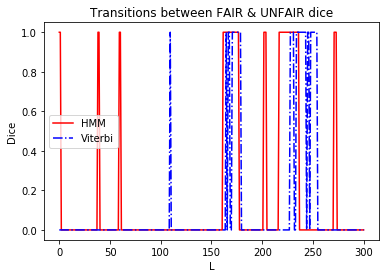

In [12]:
w = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1)
ax.set_title('Transitions between FAIR & UNFAIR dice')
ax.set_ylabel('Dice')
ax.set_xlabel('L')
ax.plot(w, hidden, label = 'HMM', color='r')
ax.plot(w, viterbi, '-.', label = 'Viterbi',color='b')
ax.legend()

### 4. Program the forward algorithm

In [13]:
def forward_algorithm(trans,emis,begin):

    frwd = np.zeros((L+1, M))
    frwd[0] = begin

    for j in range(M):
        frwd[1, j] = emis[j, hidden[0]]*begin[j]
    
    
    for i in range(2, L+1):
        for j in range(M):
                if j == 0:
                    frwd[i, j] = frwd[i-1][j]*trans[j,j]*emis[j, x[i-1]]+frwd[i-1][1]*trans[1,j]*emis[j, x[i-1]]

                if j == 1:
                    frwd[i, j] = frwd[i-1][j]*trans[j,j]*emis[j, x[i-1]]+frwd[i-1][0]*trans[0,j]*emis[j, x[i-1]]

    return frwd

In [14]:
res_fw = forward_algorithm(trans,emis,begin)[-1].sum()
res_fw

1.9764758928499334e-234

### 5. Program the backward algorithm

In [15]:
def backward_algorithm(trans,emis,begin):

    bkwd = np.zeros((L+1, M))
    
    for j in range(M):
        bkwd[L, j] = 1
    
    for i in range(L-1,-1,-1):
        for j in range(M):
            if j == 0:
                bkwd[i, j] = bkwd[i+1][j]*trans[j,j]*emis[j, x[i]] + bkwd[i+1][1]*trans[j, 1]*emis[j, x[i]]

            if j == 1:
                bkwd[i, j] = bkwd[i+1][j]*trans[j,j]*emis[j, x[i]] + bkwd[i+1][0]*trans[j, 0]*emis[j, x[i]]

    return bkwd

In [16]:
res_back = sum(backward_algorithm(trans,emis,begin)[0]*begin)
res_back

1.9764758928499345e-234

### Probabilities from FORWARD- and BACKWARD- algorithms are equal. ( res_fw = res_back )